In [1]:
%reload_ext autoreload
%autoreload 2


%matplotlib inline

## Install FastAI

https://github.com/fastai/fastai

In short, `conda activate` the python environement, and run:  
```bash
conda install -c fastai -c pytorch -c anaconda fastai gh anaconda
```

Note: For more details about the modelling approach, please refer to:  
https://github.com/fastai/fastbook/blob/master/01_intro.ipynb

In [2]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.CAMVID_TINY)

In [4]:
def acc_camvid(inp, targ, void_code=0):
    targ = targ.squeeze(1)
    mask = targ != void_code
    return (inp.argmax(dim=1)[mask] == targ[mask]).float().mean()

In [5]:
def get_y(o, path=path):
    return path / "labels" / f"{o.stem}_P{o.suffix}"

In [12]:
dls = SegmentationDataLoaders.from_label_func(
    path,
    bs=8,
    fnames=get_image_files(path / "images"),
    label_func=get_y,
    codes=np.loadtxt(path / "codes.txt", dtype=str),
)
dls.one_batch()[0].shape[-2:], get_c(dls)

(torch.Size([96, 128]), 32)

In [6]:
learn = unet_learner(dls, resnet50, metrics=acc_camvid)
learn.fine_tune(20)

epoch,train_loss,valid_loss,acc_camvid,time
0,3.901105,2.671725,0.419333,00:04


epoch,train_loss,valid_loss,acc_camvid,time
0,1.732219,1.766196,0.589736,00:03
1,1.536345,1.550913,0.612496,00:02
2,1.416585,1.170476,0.650690,00:02
3,1.300092,1.087747,0.665566,00:02
4,1.334166,1.228493,0.649878,00:03
5,1.269190,1.047625,0.711870,00:02
6,1.243131,0.969567,0.719976,00:03
7,1.164861,0.988767,0.700076,00:03
8,1.103572,0.791861,0.787799,00:02
9,1.026181,0.721673,0.806758,00:02


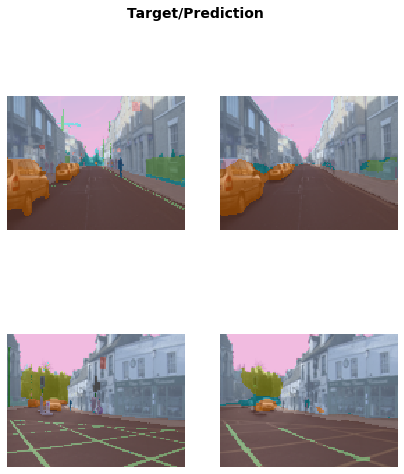

In [7]:
learn.show_results(max_n=6, figsize=(7,8))

In [9]:
learn.export("./fastai_unet.pkl")